In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

### Koordinatenumrechungen für Äquidistante Gitter

In [3]:
def calcIndex(i,j,N):
    # Gittercoordinaten i,j --> Arrayindex
    return N*(j) + (i)

In [4]:
def calcRaumkoord(i,j,h):
    # Gittercoordinaten i,j --> Raumkoordinaten x,y
    return (i)*h, (j)*h

# gitterkoordinaten i,j aus x,y
def calcGitterkoord(x,y,h):
    # Raumkoordinaten x,y --> Gittercoordinaten i,j
    return x/h,y/h

### Flatten & Reshape for 1D Gitter

In [5]:
def platt(gittermatrix):
    return np.flip(gittermatrix,0).ravel()

def stapel(gittervektor):
    N = int(np.sqrt(gittervektor.size))
    return np.flip(gittervektor.reshape(N,N),0) 

### Graphische Darstellung der Knoten

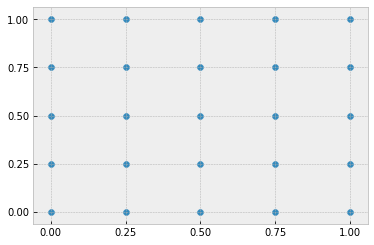

In [6]:
N = 5  # Anzahl Knoten
Kantenlaenge = 1
h = Kantenlaenge/(N-1)

fig, ax = plt.subplots()
x = np.linspace(0,Kantenlaenge,N)
y = np.linspace(0,Kantenlaenge,N)

X,Y = np.meshgrid(x,y)
ax.scatter(X,Y)
ax.xaxis.set_major_locator(plt.MultipleLocator(h))
ax.yaxis.set_major_locator(plt.MultipleLocator(h))
plt.show()

### Systemmatrix DX zur Ableitung nach x

In [7]:
def mp_matrix(N):
    h = 1/N
    diag0 = np.repeat([0],N); diag0[0] = -1; diag0[-1] = 1
    diag1 = np.repeat([0.5],N-1); diag1[0] = 1
    diagm1 = np.repeat([-0.5],N-1); diagm1[-1] = -1
    A_mp = sp.diags((diag0, diag1, diagm1),[0,1,-1])
    return A_mp
    return (1/h)*A_mp

def DX(N):
    mp_block = mp_matrix(N)
    DX = sp.block_diag([mp_block.todense()]*N)
    return DX

### Systemmatrix DY zur Ableitung nach y

In [34]:
def DY(N):
    data = np.concatenate([[-1,1],[-0.5,0.5]*(N-2),[-1,1]])
    iidx = np.repeat([N*i for i in range(0,N)],2)
    j_middle = np.concatenate([[N*i,N*(i+2)] for i in range(0,N-2)])
    jidx = np.concatenate([[0,N],j_middle,[N*(N-2),N*(N-1)]])
    
    joined_iidx = np.concatenate([iidx + np.ones(2*N)*n for n in range(N)])
    joined_jidx = np.concatenate([jidx + np.ones(2*N)*n for n in range(N)])
    joined_data = np.tile(data,N)

    DY = sp.coo_matrix((joined_data,(joined_iidx,joined_jidx)))
    return -1*DY

In [35]:
DY(3).todense()

matrix([[ 1. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ],
        [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ],
        [ 0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ],
        [ 0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. , -0.5],
        [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. , -1. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. , -1. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. , -1. ]])

In [36]:
DX(3).todense()

matrix([[-1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. , -1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  1. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  1. ]])

### Zweidimensionaler Differenzialoperator DIFF & LAPL

In [37]:
def DIFF(N):
    return DX(N)+DY(N)

def apply_GRAD(f,N):
    return np.array([DX(N).dot(f),DY(N).dot(f)])

def LAPL(N):
    dx = DX(N)
    dy = DY(N)
    return dx.dot(dx) + dy.dot(dy)

### Visualisierung der Differenzialoperatoren

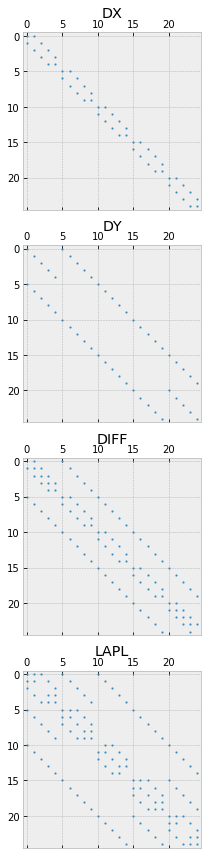

In [38]:
N = 5
spyfig, axarr = plt.subplots(4,1,figsize=(5,15))
axarr[0].spy(DX(N),precision=0.01,markersize=1)
axarr[0].set_title('DX')
axarr[1].spy(DY(N),precision=0.01,markersize=1)
axarr[1].set_title('DY')
axarr[2].spy(DIFF(N),precision=0.01,markersize=1)
axarr[2].set_title('DIFF')
axarr[3].spy(LAPL(N),precision=0.01,markersize=1)
axarr[3].set_title('LAPL')
plt.show()

### Exakte Funktionen

In [39]:
f1 = lambda x,y: np.exp(-x*y)
dx_f1 = lambda x,y: -y*np.exp(-x*y)
dy_f1 = lambda x,y: -x*np.exp(-x*y)
diff_f1 = lambda x,y: -y*np.exp(-x*y) - x*np.exp(-x*y)
lap_f1 = lambda x,y: np.exp(-x*y)*(x**2 + y**2)

f2 = lambda x,y: np.cos(10*x*y)
dx_f2 = lambda x,y: -10*y*np.sin(10*x*y)
dy_f2 = lambda x,y: -10*x*np.sin(10*x*y)
diff_f2 = lambda x,y: -10*y*np.sin(10*x*y) + -10*x*np.sin(10*x*y)
lap_f2 = lambda x,y: -100*(x**2 + y**2)*np.cos(10*x*y)

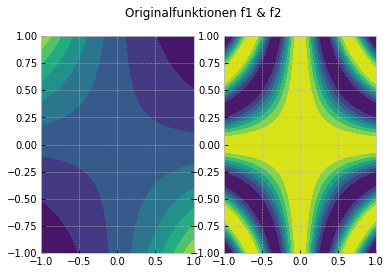

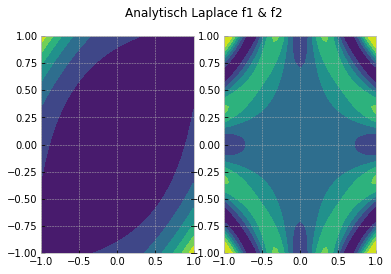

In [40]:
N = 50

func1 = f1
func2 = f2
opfunc1 = lap_f1
opfunc2 = lap_f2

fig, axes = plt.subplots(1,2)
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
axes[0].contourf(X,Y,func1(X,Y))
axes[1].contourf(X,Y,func2(X,Y))
plt.suptitle("Originalfunktionen f1 & f2")
plt.show()


fig, axes = plt.subplots(1,2)
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
axes[0].contourf(X,Y,opfunc1(X,Y))
axes[1].contourf(X,Y,opfunc2(X,Y))
plt.suptitle("Analytisch Laplace f1 & f2")
plt.show()

### Vgl. Analytische & Numerische Funktionen

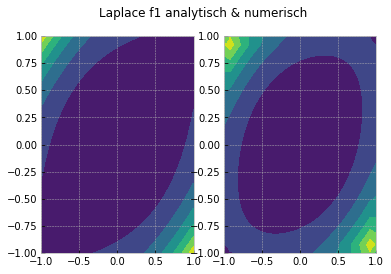

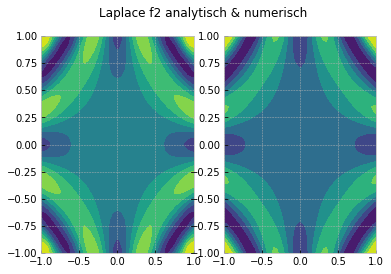

In [41]:
N = 50
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)

f1 = lambda x,y: np.exp(-x*y)
f2 = lambda x,y: np.cos(10*x*y)

func1 = lap_f1
func2 = lap_f2

F = f1(X,Y)
flatF = platt(F)
flatlaplF = LAPL(N).dot(flatF)
laplF = stapel(flatlaplF)
opfunc1 = laplF

F = f2(X,Y)
flatF = platt(F)
flatlaplF = LAPL(N).dot(flatF)
laplF = stapel(flatlaplF)
opfunc2 = laplF

fig, axes = plt.subplots(1,2)
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
axes[0].contourf(X,Y,func1(X,Y))
axes[1].contourf(X,Y,opfunc1)
plt.suptitle("Laplace f1 analytisch & numerisch")
plt.show()

fig, axes = plt.subplots(1,2)
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
axes[0].contourf(X,Y,opfunc2)
axes[1].contourf(X,Y,func2(X,Y))
plt.suptitle("Laplace f2 analytisch & numerisch")
plt.show()

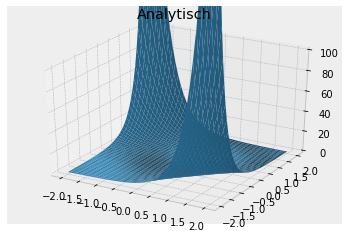

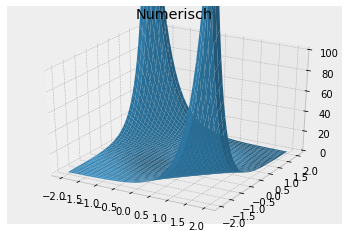

In [49]:
#%matplotlib qt
N = 50
L = 4
h = L/N
x = np.linspace(-L/2,L/2,N)
y = np.linspace(-L/2,L/2,N)
X,Y = np.meshgrid(x,y)

f = f1
opf = lap_f1

F = f(X,Y)
flatF = platt(F)
flatlaplF = 1/h**2*LAPL(N).dot(flatF)
laplF = stapel(flatlaplF)
opfunc = laplF

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X,Y,opf(X,Y))
ax1.set_title("Analytisch")
ax1.set_zlim3d(0,100)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,opfunc)
ax2.set_title("Numerisch")
ax2.set_zlim3d(0,100)
plt.show()

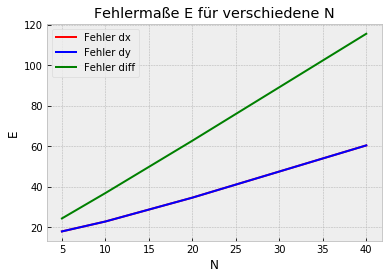

In [61]:
E_dx = []
E_dy = []
E_diff = []
my_Ns = [5,10,20,40]

for N in my_Ns:
    L = 2
    h = L/(N)
    x = np.linspace(-L/2,L/2,N)
    y = np.linspace(-L/2,L/2,N)
    X,Y = np.meshgrid(x,y)
    
    ### DX ###
    func = f1
    d_func = dx_f1
    dx_ex = np.zeros([N,N])
    #calculate exact dx_f
    for i in range(N):
        for j in range(N):
            dx_ex[i,j] = d_func(i,j)
    # calculate numeric dx_f
    flatF = platt(func(X,Y))
    flat_dFdx = 1/h**DX(N).dot(flatF)
    dx_num = stapel(flat_dFdx)
    #calculate discretisation error
    E_dx.append(h**2 * np.sum((dx_ex - dx_num)**2))
    
        
    ### DY ###
    func = f1
    d_func = dy_f1
    dy_ex = np.zeros([N,N])
    #calculate exact dx_f
    for i in range(N):
        for j in range(N):
            dy_ex[i,j] = d_func(i,j)
    # calculate numeric dx_f
    flatF = platt(func(X,Y))
    flat_dFdy = 1/h**DY(N).dot(flatF)
    dy_num = stapel(flat_dFdy)
    #calculate discretisation error
    E_dy.append(h**2 * np.sum((dy_ex - dy_num)**2))
    
    ### DIFF ###
    func = f1
    d_func = diff_f1
    d_ex = np.zeros([N,N])
    #calculate exact dx_f
    for i in range(N):
        for j in range(N):
            d_ex[i,j] = d_func(i,j)
    # calculate numeric dx_f
    flatF = platt(func(X,Y))
    flat_dF = 1/h**DIFF(N).dot(flatF)
    d_num = stapel(flat_dF)
    #calculate discretisation error
    E_diff.append(h**2 * np.sum((d_ex - d_num)**2))
    
    
fix, ax = plt.subplots()
ax.set_title("Fehlermaße E für verschiedene N")
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.plot(my_Ns,E_dx,label='Fehler dx',color="red")
ax.plot(my_Ns,E_dy,label='Fehler dy',color="blue")
ax.plot(my_Ns,E_diff,label='Fehler diff',color="green")
ax.legend()
plt.show()

In [ ]:
no